# Homework 5

In [1]:
#!/bin/python3
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d
import scipy.optimize as opt

40
d: 426.6825868051848
d: 423.9959616376916
d: 421.9590208100637
d: 415.16015268214926
d: 396.6918715672806
d: 390.9292684687694
d: 387.6729762958565
d: 385.79580895895054
d: 377.2153814987294
d: 367.6730810221558
d: 356.34455124478836
d: 353.7522031428461
d: 352.12917106437664
d: 350.736829475619
d: 342.6976194147136
d: 340.88347474671764
d: 336.91343472651374
d: 330.82077423493695
d: 329.16706107580285
d: 321.6302878439629
d: 319.2500379900075
d: 313.8515094297421


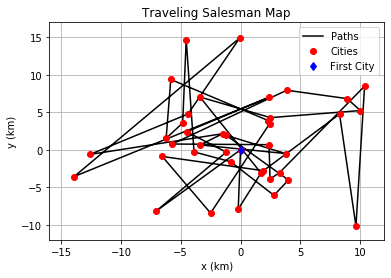

path length: 313.8515094297421km


In [2]:
# citypath.py - Traveling Salesman

def plotit(p, n, x, y, fname):
    
    xx, yy = np.append(x[p], x[0]), np.append(y[p], y[0])
    plt.axis([-16, 12, -12, 17])
    plt.plot(xx, yy, 'k-', label = 'Paths')
    plt.plot(xx, yy, 'ro', label = 'Cities')
    plt.plot(xx[0], yy[0], 'bd', label = 'First City')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.title('Traveling Salesman Map')
    plt.grid()
    plt.legend()
    plt.show()
    plt.savefig(fname)
    plt.close();
    
def distance(p, x, y, n):
    
    xp, yp = x[p], y[p]
    d = np.sqrt((xp[0] - xp[-1])**2 + (yp[0] - yp[-1])**2)
    d += np.sum(np.sqrt((xp[1:] - xp[:-1])**2 + (yp[1:] - xp[:-1])**2))
    
    return d

def isgood(p, n):
    
    if p[0] != 0: return False
    if len(np.unique(p)) != n: return False
    
    return True


def swap(a, i, j):
    
    temp = a[i]
    a[i] = a[j]
    a[j] = temp
    
    return a



# x, y = np.loadtxt('https://www.physics.utah.edu/~bromley/courses/p6720/data/sites.txt')
x, y = np.loadtxt('sites.txt', unpack = True, usecols = [0, 1])
n = len(x)

p = np.arange(n)
pbest = np.copy(p)
dbest = distance(p, x, y, n)

print(n)





np.random.seed(123412227)

for i in range(1, 10000):
#     np.random.shuffle(p[1:])

    p = pbest

    j = np.random.randint(1, n - 2)
    k = np.random.randint(1, n - 2)
    
    if j != k:

        p = swap(p[1:], j, k)
        
    elif j == k:
        
        k += 1
        
        p = swap(p[1:], j, k)
        

    if len(np.unique(p)) < n:
        
        p = pbest
        
        

    if isgood(p, n) == False:
        
        print(n)
        print(len(np.unique(p)))
        print(p)
        print('bad path?')
        quit()

    d = distance(p, x, y, n)

    if d < dbest:

        pbest = np.copy(p)
        dbest = d
        print(f'd: {d}')
        

plotit(pbest, n, x, y, 'minpath.png')
# plt.plot(pbest, n)
# plt.plot(x, y, 'bo')
print(f'path length: {dbest}km')

[27.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.]


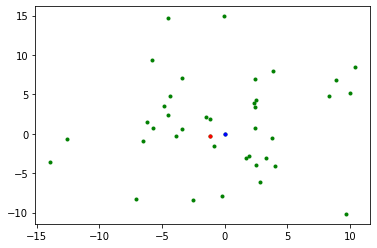

In [16]:
dist1 = np.zeros(len(p)); dist1[0] = p[1]


#for j in range(0, len(p)):
for i in range(1, len(p)):

    if np.sqrt((x[p[0]] - x[p[i]])**2 + (y[p[0]] - y[p[i]])**2) < np.sqrt((x[p[0]] - x[dist1[0].astype(int)])**2 + (y[p[0]] - y[dist1[0].astype(int)])**2):

        dist1[0] = p[i]

print(dist1)
plt.plot(x, y, 'g.')
plt.plot(x[p[0]], y[p[0]], 'b.', zorder = 10)
plt.plot(x[dist1[0].astype(int)], y[dist1[0].astype(int)], 'r.', zorder = 10);

p: [ 0  1 27 24  2 38 16 37 18 20  4 22  6 13 29 14 10  8  9 36 25 31 39 33
 35  3 11 12 26 23 21  7 30 19 15 28 17  5 34 32]
pcopy: [ 1 27 24  2 38 16 37 18 20  4 22  6 13 29 14 10  8  9 36 25 31 39 33 35
  3 11 12 26 23 21  7 30 19 15 28 17  5 34 32]
dist: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
first time ^^^^




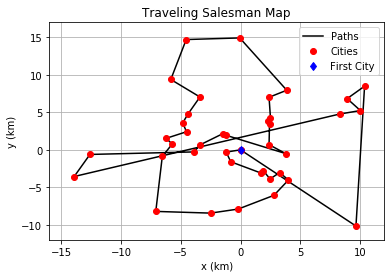

304.89153673092926

In [3]:
dist = np.zeros(len(p)); dist[0] = p[0]; dist[1] = p[1]

pcopy = p.copy()
pcopy = np.delete(pcopy, 0)


print(f'p: {p}')
print(f'pcopy: {pcopy}')
print(f'dist: {dist}')
print('first time ^^^^\n\n')

counts = 0

for i in range(1, len(p)):

    looplength = len(pcopy)
    myTrue = False

    for j in range(1, looplength):
        
        counts += 1

        if (np.sqrt((x[dist[i - 1].astype(int)] - x[pcopy[j]])**2 + (y[dist[i - 1].astype(int)] - y[pcopy[j]])**2) < np.sqrt((x[dist[i - 1].astype(int)] - x[dist[i].astype(int)])**2 + (y[dist[i - 1].astype(int)] - y[dist[i].astype(int)])**2)):

            dist[i] = pcopy[j]
            deletenum = j
            
            myTrue = True
            
#             print(f'\npcopy[{j}]: {pcopy[j]} in for loop')
            
    if myTrue == False:

#         print('Failed to Change')

        dist[i] = pcopy[0]
        deletenum = 0
    
#     print(myTrue)
    pcopy = np.delete(pcopy, deletenum) #dist[i].astype(int))
    
    if len(pcopy) == 0:
        
        break
    
    dist[i + 1] = pcopy[0]

#     p[dist[i].astype(int)] = 0

#     print(f'\ndist[{i}]: {dist[i].astype(int)}')
#     print(f'pcopy: {pcopy}')
#     print(f'dist: {dist}')

#     plt.plot(x, y, 'g.')
#     plt.plot(x[dist[i - 1].astype(int)], y[dist[i - 1].astype(int)], 'b.', zorder = 10, label = 'Start')
#     plt.plot(x[dist[i].astype(int)], y[dist[i].astype(int)], 'r.', zorder = 10, label = 'Next');
#     plt.legend()
#     plt.show()
    
# print(counts)

plotit(dist.astype(int), n, x, y, 'trialpath.jpg')
distance(dist.astype(int), x, y, n)

In [31]:
dist

array([ 0., 27., 14., 34.,  3., 21., 23., 13., 29., 32., 33.,  1., 35.,
       30., 36., 24.,  9., 37.,  5., 25.,  8., 16., 19.,  2., 17., 31.,
       39.,  7., 22.,  6., 20.,  4., 10., 18., 38., 11., 28., 15., 26.,
       12.])

In [11]:
# for i in range(len(p)):
    
#     print(x[p[i]], y[p[i]])

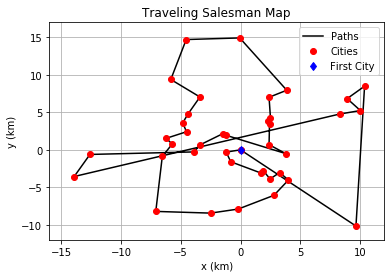

304.89153673092926

In [32]:
plotit(dist.astype(int), n, x, y, 'trialpath.jpg')
distance(dist.astype(int), x, y, n)

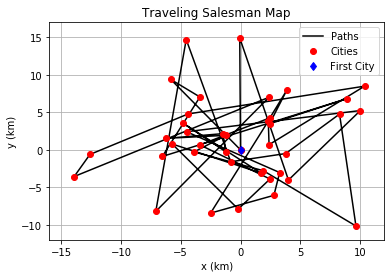

In [45]:
plotit(p, n, x, y, 'trialpath.jpg')

In [10]:
p[1:]

array([ 1, 27, 24,  2, 38, 16, 37, 18, 20,  4, 22,  6, 13, 29, 14, 10,  8,
        9, 36, 25, 31, 39, 33, 35,  3, 11, 12, 26, 23, 21,  7, 30, 19, 15,
       28, 17,  5, 34, 32])

40
p: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
pcopy: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
dist: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
first time ^^^^


[ 0. 27. 14. 34.  3. 21. 23. 13. 29. 32. 33.  1. 35. 30. 36. 24.  9. 37.
  5. 25.  8. 16. 19.  2. 17. 31. 39.  7. 22.  6. 20.  4. 10. 18. 38. 11.
 28. 15. 26. 12.]


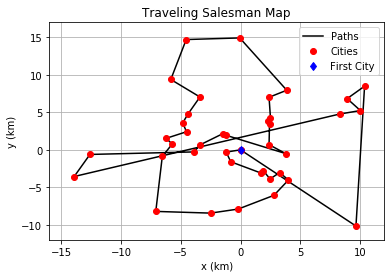

304.89153673092926
d: 338.3069798822122
d: 337.0397986000208
d: 334.9119818536614
d: 334.8695712622101
d: 334.76986205171266
d: 325.55133667762505
d: 324.4148628018883
d: 320.7860299249561
d: 315.5047328723616
d: 312.63052532021305
d: 310.6105215764029
d: 299.81646294141837
d: 296.669913059984
d: 294.94571319577346
d: 284.92112357550127


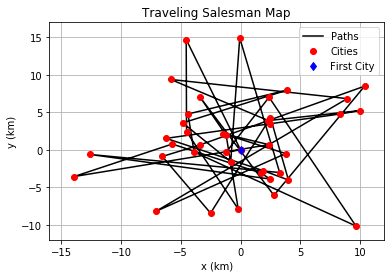

path length: 284.92112357550127km


In [8]:
# citypath.py - Traveling Salesman

def plotit(p, n, x, y, fname):
    
    xx, yy = np.append(x[p], x[0]), np.append(y[p], y[0])
    plt.axis([-16, 12, -12, 17])
    plt.plot(xx, yy, 'k-', label = 'Paths')
    plt.plot(xx, yy, 'ro', label = 'Cities')
    plt.plot(xx[0], yy[0], 'bd', label = 'First City')
    plt.xlabel('x (km)')
    plt.ylabel('y (km)')
    plt.title('Traveling Salesman Map')
    plt.grid()
    plt.legend()
    plt.show()
    plt.savefig(fname)
    plt.close();
    
def distance(p, x, y, n):
    
    xp, yp = x[p], y[p]
    d = np.sqrt((xp[0] - xp[-1])**2 + (yp[0] - yp[-1])**2)
    d += np.sum(np.sqrt((xp[1:] - xp[:-1])**2 + (yp[1:] - xp[:-1])**2))
    
    return d

def isgood(p, n):
    
    if p[0] != 0: return False
    if len(np.unique(p)) != n: return False
    
    return True


def swap(a, i, j):
    
    temp = a[i]
    a[i] = a[j]
    a[j] = temp
    
    return a



# x, y = np.loadtxt('https://www.physics.utah.edu/~bromley/courses/p6720/data/sites.txt')
x, y = np.loadtxt('sites.txt', unpack = True, usecols = [0, 1])
n = len(x)

p = np.arange(n)
pbest = np.copy(p)
dbest = distance(p, x, y, n)

print(n)



# My solution first

dist = np.zeros(len(p)); dist[0] = p[0]; dist[1] = p[1]

pcopy = p.copy()
pcopy = np.delete(pcopy, 0)


print(f'p: {p}')
print(f'pcopy: {pcopy}')
print(f'dist: {dist}')
print('first time ^^^^\n\n')


for i in range(1, len(p)):

    looplength = len(pcopy)
    myTrue = False

    for j in range(1, looplength):

        if (np.sqrt((x[dist[i - 1].astype(int)] - x[pcopy[j]])**2 + (y[dist[i - 1].astype(int)] - y[pcopy[j]])**2) < np.sqrt((x[dist[i - 1].astype(int)] - x[dist[i].astype(int)])**2 + (y[dist[i - 1].astype(int)] - y[dist[i].astype(int)])**2)):

            dist[i] = pcopy[j]
            deletenum = j
            
            myTrue = True
            
#             print(f'\npcopy[{j}]: {pcopy[j]} in for loop')
            
    if myTrue == False:

#         print('yay')

        dist[i] = pcopy[0]
        deletenum = 0
    
    pcopy = np.delete(pcopy, deletenum) #dist[i].astype(int))
    
    if len(pcopy) == 0:
        
        break
    
    dist[i + 1] = pcopy[0]

#     p[dist[i].astype(int)] = 0

#     print(f'\ndist[{i}]: {dist[i].astype(int)}')
#     print(f'pcopy: {pcopy}')
#     print(f'dist: {dist}')

#     plt.plot(x, y, 'g.')
#     plt.plot(x[dist[i - 1].astype(int)], y[dist[i - 1].astype(int)], 'b.', zorder = 10, label = 'Start')
#     plt.plot(x[dist[i].astype(int)], y[dist[i].astype(int)], 'r.', zorder = 10, label = 'Next');
#     plt.plot(x[dist[i].astype(int):], y[dist[i].astype(int):], 'k-', zorder = 0, label = 'Paths');
#     plt.legend()
#     plt.show()

print(dist)

plotit(dist.astype(int), n, x, y, 'trialpath.jpg')
print(distance(dist.astype(int), x, y, n))


distbest = dist.astype(int)


# Then use the swap function to try and make it better

np.random.seed(123412227)

for i in range(1, 100000):
#     np.random.shuffle(p[1:])

    dist = distbest

    j = np.random.randint(1, n - 2)
    k = np.random.randint(1, n - 2)
    
    if j != k:

        dist = swap(dist[1:], j, k)
        
    elif j == k:
        
        k += 1
        
        dist = swap(dist[1:], j, k)
        

    if len(np.unique(dist)) < n:
        
        dist = distbest
        
        

    if isgood(dist, n) == False:
        
        print(n)
        print(len(np.unique(dist)))
        print(dist)
        print('bad path?')
        quit()

    d = distance(dist, x, y, n)

    if d < dbest:

        distbest = np.copy(dist)
        dbest = d
        print(f'd: {d}')
        

plotit(distbest, n, x, y, 'minpath.png')
# plt.plot(pbest, n)
# plt.plot(x, y, 'bo')
print(f'path length: {dbest}km')